<a href="https://colab.research.google.com/github/Yuvrajs29/Stock-Price-Analysis-and-Strategy-Backtesting-Engine/blob/main/Stock_Price_Analysis_and_Strategy_Backtesting_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr

In [ ]:
end = dt.datetime.now()
start = end - dt.timedelta(2025,1,1)
start, end

(datetime.datetime(2020, 6, 12, 9, 59, 42, 62552),
 datetime.datetime(2025, 12, 28, 9, 59, 43, 62553))

In [ ]:
stocklist =['RELIANCE','TCS']
stocks = [i + '.NS' for i in stocklist]
stocks

['RELIANCE.NS', 'TCS.NS']

In [ ]:
import yfinance as yf
df = yf.download(stocks, start=start, end=end)
df.head()

/tmp/ipython-input-2080931309.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stocks, start=start, end=end)
[*********************100%***********************]  2 of 2 completed


Price            Close                     High                      Low  \
Ticker     RELIANCE.NS       TCS.NS RELIANCE.NS       TCS.NS RELIANCE.NS   
Date                                                                       
2020-06-12  717.491882  1810.206909  719.388570  1818.816332  676.035556   
2020-06-15  729.120422  1801.686279  734.720180  1827.514658  704.982736   
2020-06-16  730.542847  1815.798462  744.474481  1840.783577  715.911176   
2020-06-17  729.481567  1817.573608  738.558574  1827.381342  723.497958   
2020-06-18  747.793823  1808.964478  751.903322  1827.692267  725.078667   

Price                          Open                   Volume           
Ticker           TCS.NS RELIANCE.NS       TCS.NS RELIANCE.NS   TCS.NS  
Date                                                                   
2020-06-12  1784.911054  677.390358  1785.088525    38548899  2842642  
2020-06-15  1775.990950  706.743967  1809.851916    53107403  2399022  
2020-06-16  1802.662327  741.968181  1832.839835    51187003  2146528  
2020-06-17  1798.712666  726.275230  1815.975932    41782053  2703527  
2020-06-18  1797.514752  725.710916  1815.088760    40471557  1944389

In [ ]:
df.index

DatetimeIndex(['2020-06-12', '2020-06-15', '2020-06-16', '2020-06-17',
               '2020-06-18', '2020-06-19', '2020-06-22', '2020-06-23',
               '2020-06-24', '2020-06-25',
               ...
               '2025-12-12', '2025-12-15', '2025-12-16', '2025-12-17',
               '2025-12-18', '2025-12-19', '2025-12-22', '2025-12-23',
               '2025-12-24', '2025-12-26'],
              dtype='datetime64[ns]', name='Date', length=1376, freq=None)

In [ ]:
df.columns

MultiIndex([( 'Close', 'RELIANCE.NS'),
            ( 'Close',      'TCS.NS'),
            (  'High', 'RELIANCE.NS'),
            (  'High',      'TCS.NS'),
            (   'Low', 'RELIANCE.NS'),
            (   'Low',      'TCS.NS'),
            (  'Open', 'RELIANCE.NS'),
            (  'Open',      'TCS.NS'),
            ('Volume', 'RELIANCE.NS'),
            ('Volume',      'TCS.NS')],
           names=['Price', 'Ticker'])

In [ ]:
Close = df.Close
Close.head()

Ticker,RELIANCE.NS,TCS.NS
Date,,
2020-06-12,717.491882,1810.206909
2020-06-15,729.120422,1801.686279
2020-06-16,730.542847,1815.798462
2020-06-17,729.481567,1817.573608
2020-06-18,747.793823,1808.964478


In [ ]:
Close[Close.index > end - dt.timedelta(days=100)].describe(percentiles=[0.1,0.5,0.9])

Ticker,RELIANCE.NS,TCS.NS
count,67.000000,67.000000
mean,1482.137318,3089.718586
std,71.952444,115.303478
min,1363.400024,2877.667236
10%,1374.720020,2957.039990
50%,1496.099976,3073.199951
90%,1560.879980,3237.179980
max,1575.400024,3324.899902


<Axes: xlabel='Date'>

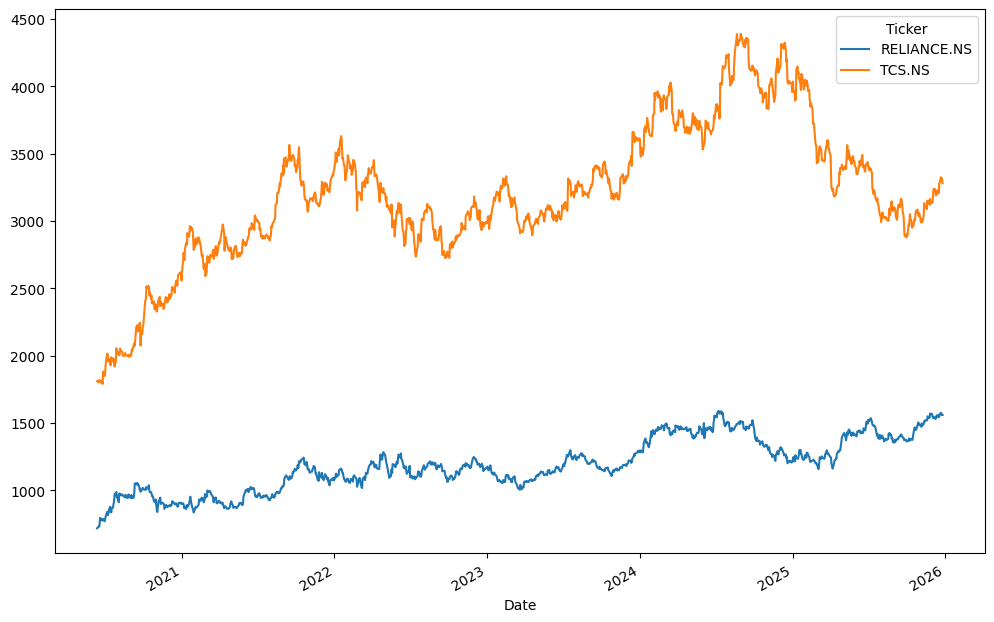

In [ ]:
Close.plot(figsize=(12,8))

In [ ]:
import matplotlib.pyplot as plt
pd.options.plotting.backend = 'matplotlib'

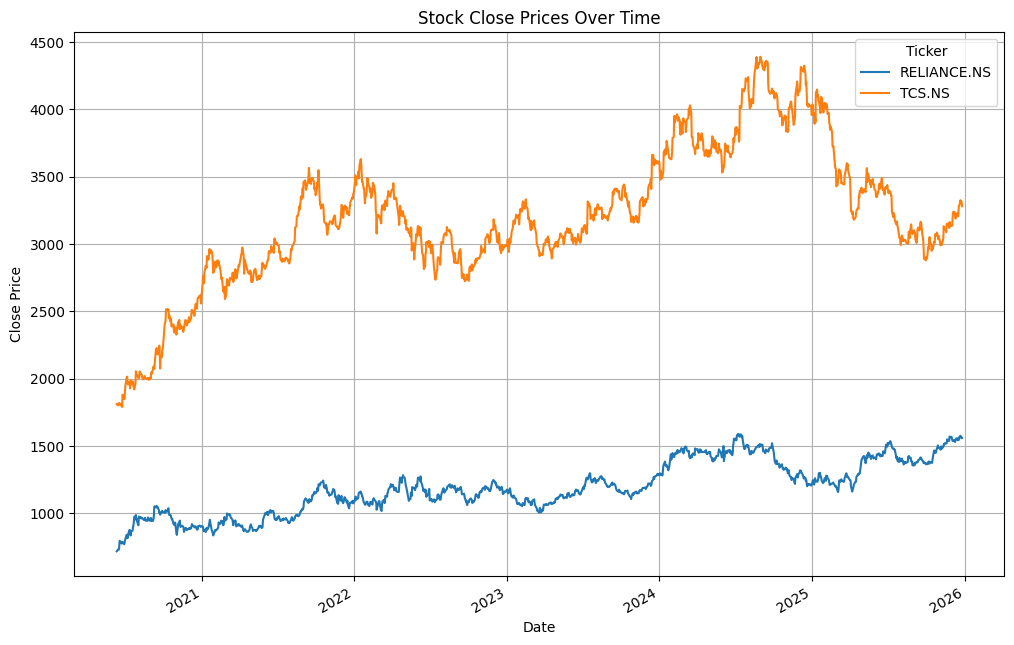

In [ ]:
fig1 = Close.plot(figsize=(12,8))
plt.title('Stock Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

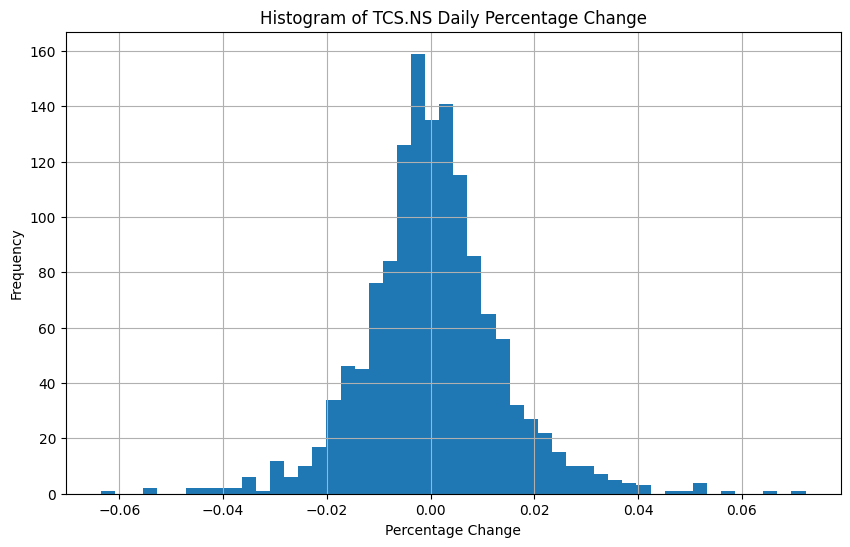

In [ ]:
fig2 = Close['TCS.NS'].pct_change().plot(kind='hist', bins=50, figsize=(10,6))
plt.title('Histogram of TCS.NS Daily Percentage Change')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Calculate the percentage change for each stock's 'Close' price
returns_df = df['Close'].pct_change()

# Assign the returns for each stock to a new MultiIndex column
# For example, this will create ('Returns', 'RELIANCE.NS') and ('Returns', 'TCS.NS')
for ticker in stocks:
    df[('Returns', ticker)] = returns_df[ticker]

In [ ]:
for ticker in stocks:
    df[('Volatility', ticker)] = df['Returns'][ticker].rolling(window=20).std()

<Axes: xlabel='Date'>

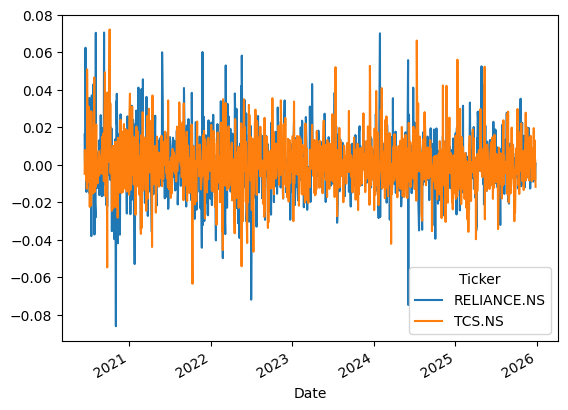

In [ ]:
returns_df.plot()

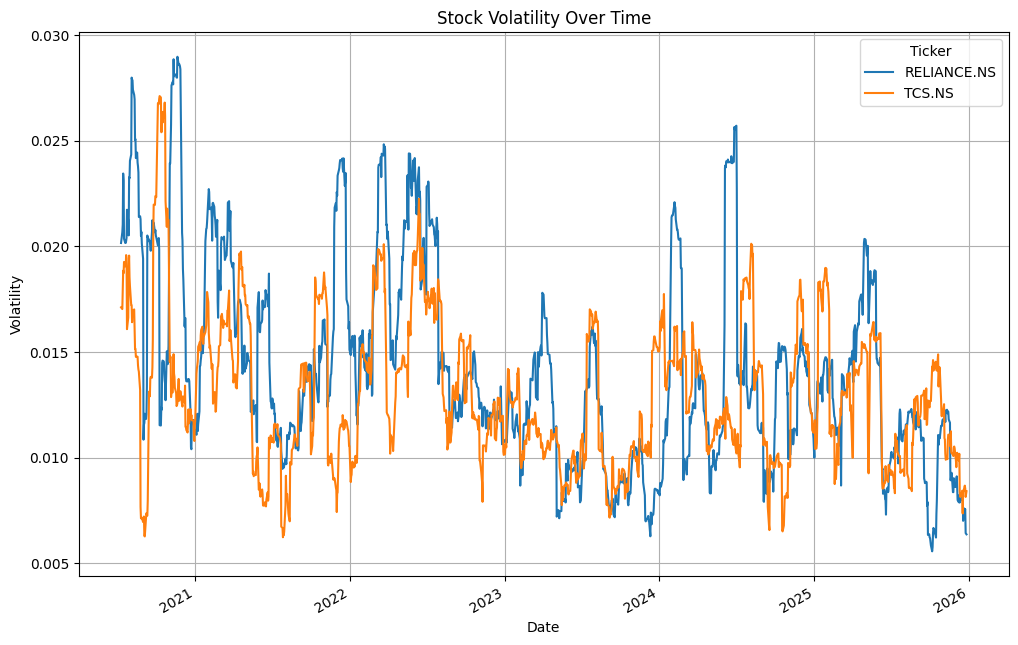

In [ ]:
df['Volatility'].plot(figsize=(12,8))
plt.title('Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

In [ ]:
cum_returns = (1 + df['Returns']).cumprod()
running_max = cum_returns.cummax()
drawdown = (cum_returns - running_max) / running_max


<Axes: xlabel='Date'>

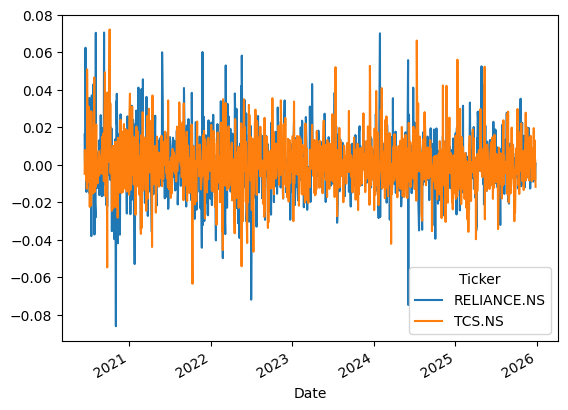

In [ ]:
returns_df.plot()

In [ ]:
for ticker in stocks:
    df[('MA20', ticker)] = df['Close'][ticker].rolling(20).mean()
    df[('MA50', ticker)] = df['Close'][ticker].rolling(50).mean()
    df[('Signal', ticker)] = (df[('MA20', ticker)] > df[('MA50', ticker)]).astype(int)

In [ ]:
capital = 100000
position = 0

# Assuming we are trading the first stock in the list for this simple simulation
# If you want to trade all stocks, the logic for capital and position needs to be adapted for each stock.
stock_to_trade = stocks[0] # For example, 'RELIANCE.NS'

for i in range(len(df)):
    # Get the signal and close price for the current stock and date
    current_signal = df[('Signal', stock_to_trade)].iloc[i]
    current_price = df[('Close', stock_to_trade)].iloc[i]

    # Skip if data is not available for the current date or stock
    if pd.isna(current_signal) or pd.isna(current_price):
        continue

    # Trading logic:
    # If there's a buy signal (1) and we don't hold any position
    if current_signal == 1 and position == 0:
        if capital > 0: # Ensure we have capital to buy
            # Buy shares
            shares_to_buy = capital / current_price
            position = shares_to_buy
            capital = 0 # All capital invested
    # If there's a sell signal (0) and we hold a position
    elif current_signal == 0 and position > 0:
        # Sell shares
        capital = position * current_price
        position = 0

# Optional: Print final state of the simulation
print(f"Simulation for {stock_to_trade}:")
print(f"  Final Capital: {capital:.2f}")
print(f"  Final Position (shares): {position:.2f}")

# Calculate the value of any held position at the last available close price
final_position_value = 0
if position > 0 and not df[('Close', stock_to_trade)].empty:
    last_price = df[('Close', stock_to_trade)].iloc[-1]
    final_position_value = position * last_price

print(f"  Value of final position: {final_position_value:.2f}")
print(f"  Total Final Portfolio Value: {capital + final_position_value:.2f}")

Simulation for RELIANCE.NS:
  Final Capital: 0.00
  Final Position (shares): 64.71
  Value of final position: 100902.38
  Total Final Portfolio Value: 100902.38
